In [1]:
import math
import matplotlib.pyplot as plt
import numpy

MAX_ITERATION = 100

In [2]:
def funcao(x): #Escrever a função da conta aqui
    return pow(x-2, 4)
    #return math.log(x, 4)
    #return (x*x)+(2*x) 

In [3]:
def busca_dicotomica(epsilon, l, a, b, k):
    if k > MAX_ITERATION:
        print("----------limite de interações busca dicotômica----------")
        return (a+b)/2
    
    if abs(b - a) < l:
        return (a+b)/2
        
    if funcao(((a+b)/2)-epsilon) < funcao(((a+b)/2)+epsilon):
        return busca_dicotomica(epsilon, l, a, (((a+b)/2)+epsilon), k + 1)
    else:
        return busca_dicotomica(epsilon, l, (((a+b)/2)-epsilon), b, k + 1)

In [4]:
def gera_fibonacci(n):
    if n == 1 or n == 2:
        return 1
    else:
        return gera_fibonacci(n - 1) + gera_fibonacci(n - 2)

In [5]:
def busca_fibonacci(epsilon, l, a, b, k, fib_n):
    if k > MAX_ITERATION:
        print("----------limite de interações busca Fibonacci----------")
        return (a+b)/2
    
    if abs(b - a) < l:
        return (a+b)/2
    
    lambda_var = a+((fib_n[0]/fib_n[2])*(b - a))
    mi_var = a+((fib_n[1]/fib_n[2])*(b - a))
    if funcao(lambda_var) < funcao(mi_var):
        return busca_fibonacci(epsilon, l, a, mi_var, k+1, fib_n)
    else:
        return busca_fibonacci(epsilon, l, lambda_var, b, k+1, fib_n)

In [6]:
def derivada_numerica(x):
    h = 0.00001
    return (funcao(x+h)-funcao(x))/h

def derivada_numerica_segunda(x):
    h = 0.001
    return (funcao(x)-(2*funcao(x-h))+funcao(x-2*h))/(h*h)

In [7]:
def busca_newton(x, x_k, k, e):
    if k > MAX_ITERATION:
        print("----------limite de interações busca Newton----------")
        return x_k
    else:
        if abs(derivada_numerica(x_k)) < e:
            return x_k
        else:
            return busca_newton(x, x_k-(derivada_numerica(x_k)/derivada_numerica_segunda(x)), k+1, e)

In [8]:
def busca_quadratica(x, x1, x2, x3, k, e):
    up_ddp = funcao(x1)*(x2-x3)
    up_ddp += funcao(x2)*(x3-x1)
    up_ddp += funcao(x3)*(x1-x2)
    down_ddp = (x2-x3)*(x3-x1)*(x1-x2)
    
    if (up_ddp/down_ddp) < 0:
        up_dp = funcao(x1)*(x2*x2-x3*x3)
        up_dp += funcao(x2)*(x3*x3-x1*x1)
        up_dp += funcao(x3)*(x1*x1-x2*x2)
        down_dp = funcao(x1)*(x2-x3)
        down_dp += funcao(x2)*(x3-x1)
        down_dp += funcao(x3)*(x1-x2)
    
        if down_dp != 0:
            x_ = 0.5*(up_dp/down_dp)
        else:
            return x_
        #if derivada_numerica(x_) < e:#abs(derivative(funcao, x_, 0.01)) < e:
        #   return x_
        
        if k > MAX_ITERATION:
            print("----------limite de interações busca quadrática----------")
            return x_
    
        if (x1<x_ and x_<x3) or (x3<x_ and x_<x1):
            if funcao(x_) < funcao(x3):
                return busca_quadratica(x, x1, x3, x_, k+1, e)
            else:
                return busca_quadratica(x, x_, x2, x3, k+1, e)
        else:
            if funcao(x3) < funcao(x_):
                return busca_quadratica(x, x1, x_, x3, k+1, e)
            else:
                return busca_quadratica(x, x3, x2, x_, k+1, e)
    else:
        print("Erro da segunda derivada de p(x), d^2p(x)/dx^2 > 0")
        return -1

In [9]:
def call_metodo(min_range, max_range, step, epsilon):
    
    eixo_x = numpy.arange(min_range, max_range, step)
    eixo_y = [funcao(i) for i in eixo_x]
        
    fig, ax = plt.subplots()
    
    
    #Busca dicotômica
    l_dicotomica = 0.04
    if epsilon >= l_dicotomica: #Checa se epsilon é menor que l
        print("Erro, Epsilon maior que l em busca dicotômica!")
    else:
        x_busca_dicotomica = busca_dicotomica(epsilon, l_dicotomica, min_range, max_range, 0)
        f_x_busca_dicotomica = funcao(x_busca_dicotomica)
        print(f"Busca dicôtomica mínimo -> f({x_busca_dicotomica}) = {f_x_busca_dicotomica}")
        ax.plot(x_busca_dicotomica, f_x_busca_dicotomica, "ro", label="Busca dicotômica")
    #Fim busca dicotômica
    
    print("------------------------------------------------------------------------------------------------")
    
    #Busca Fibonacci
    n_fibonacci = 10
    fibonacci_list = [gera_fibonacci(n_fibonacci-1), gera_fibonacci(n_fibonacci), gera_fibonacci(n_fibonacci+1)]
    l_fibonacci = (max_range - min_range)/gera_fibonacci(n_fibonacci)
    x_busca_fibonacci = busca_fibonacci(epsilon, l_fibonacci, min_range, max_range, 0, fibonacci_list)
    f_x_busca_fibonacci = funcao(x_busca_fibonacci)
    print(f"Busca Fibonacci mínimo -> f({x_busca_fibonacci}) = {f_x_busca_fibonacci}")
    ax.plot(x_busca_fibonacci, f_x_busca_fibonacci, "bo", label="Busca Fibonacci")
    #Fim busca Fibonacci
    
    print("------------------------------------------------------------------------------------------------")
    
    #Busca de Newton
    e_newton = 0.001
    x_busca_newton = busca_newton(min_range-1, max_range+1, 0, e_newton)
    f_x_busca_newton = funcao(x_busca_newton)
    print(f"Busca Newton mínimo -> f({x_busca_newton}) = {f_x_busca_newton}")
    ax.plot(x_busca_newton, f_x_busca_newton, "go", label="busca Newton")
    #Fim busca de Newton
    
    print("------------------------------------------------------------------------------------------------")
    
    #Busca quadrática
#     e_quadratica = 10
#     x_busca_quadratica = busca_quadratica(min_range, min_range, max_range, abs(min_range+max_range)/2, 0, e_quadratica)
#     f_x_busca_quadratica = funcao(x_busca_quadratica)
#     print(f"Busca quadrática mínimo -> f({x_busca_quadratica}) = {f_x_busca_quadratica}")
#     ax.plot(x_busca_quadratica, f_x_busca_quadratica, "yo", label="busca quadrática")
    #Fim busca quadrática

    
    ax.plot(eixo_x, eixo_y)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

Busca dicôtomica mínimo -> f(2.0052929687499996) = 7.848692593686398e-10
------------------------------------------------------------------------------------------------
Busca Fibonacci mínimo -> f(1.9970451497187245) = 7.623280892582561e-11
------------------------------------------------------------------------------------------------
----------limite de interações busca Newton----------
Busca Newton mínimo -> f(2.7102588026017815) = 0.254487525825297
------------------------------------------------------------------------------------------------


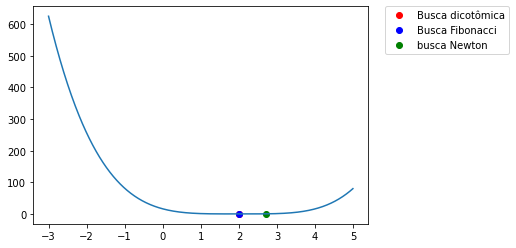

In [10]:
call_metodo(-3, 5, 0.01, 0.01)